<h1>Introduction to Linear Regression</h1>

<h2>Key Concepts</h2>

- Visualize multivariate data
- Fit a linear model
- Check the goodness of fit

<h2>Visualize Multivariate Data</h2>

First, we will load some helpful Python statistics packages:

- Pandas is a general purpose package for data analysis, particularly datasets that are measured over time (*pan*el *da*taset*s*)
- Numpy is a package for easily manipulating matrices and includes some basic multivariate statistics and linear algebra functions
- Matplotlib is a package for plotting data

All of these packages can be downloaded for free online.

In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In this class, we'll look at a basic dataset of home prices, derived from actual transactions.  The dataset comes as a list of comma-separated values (.csv), for which Pandas provides a convenient loading function.

In [2]:
data = pd.read_csv("../datasets/real_estate.csv")
data.head()

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900,3,1,1249,87.99,Short Sale


An obvious hypothesis to test is whether or not larger houses are more expensive.  (In our jobs, most linear relationships we hypothesize don't end up working, so we wanted to pick something that we were pretty sure would work.)  We first plot the data to see if ther is a relationship between the two variables.

<IPython.core.display.Javascript object>


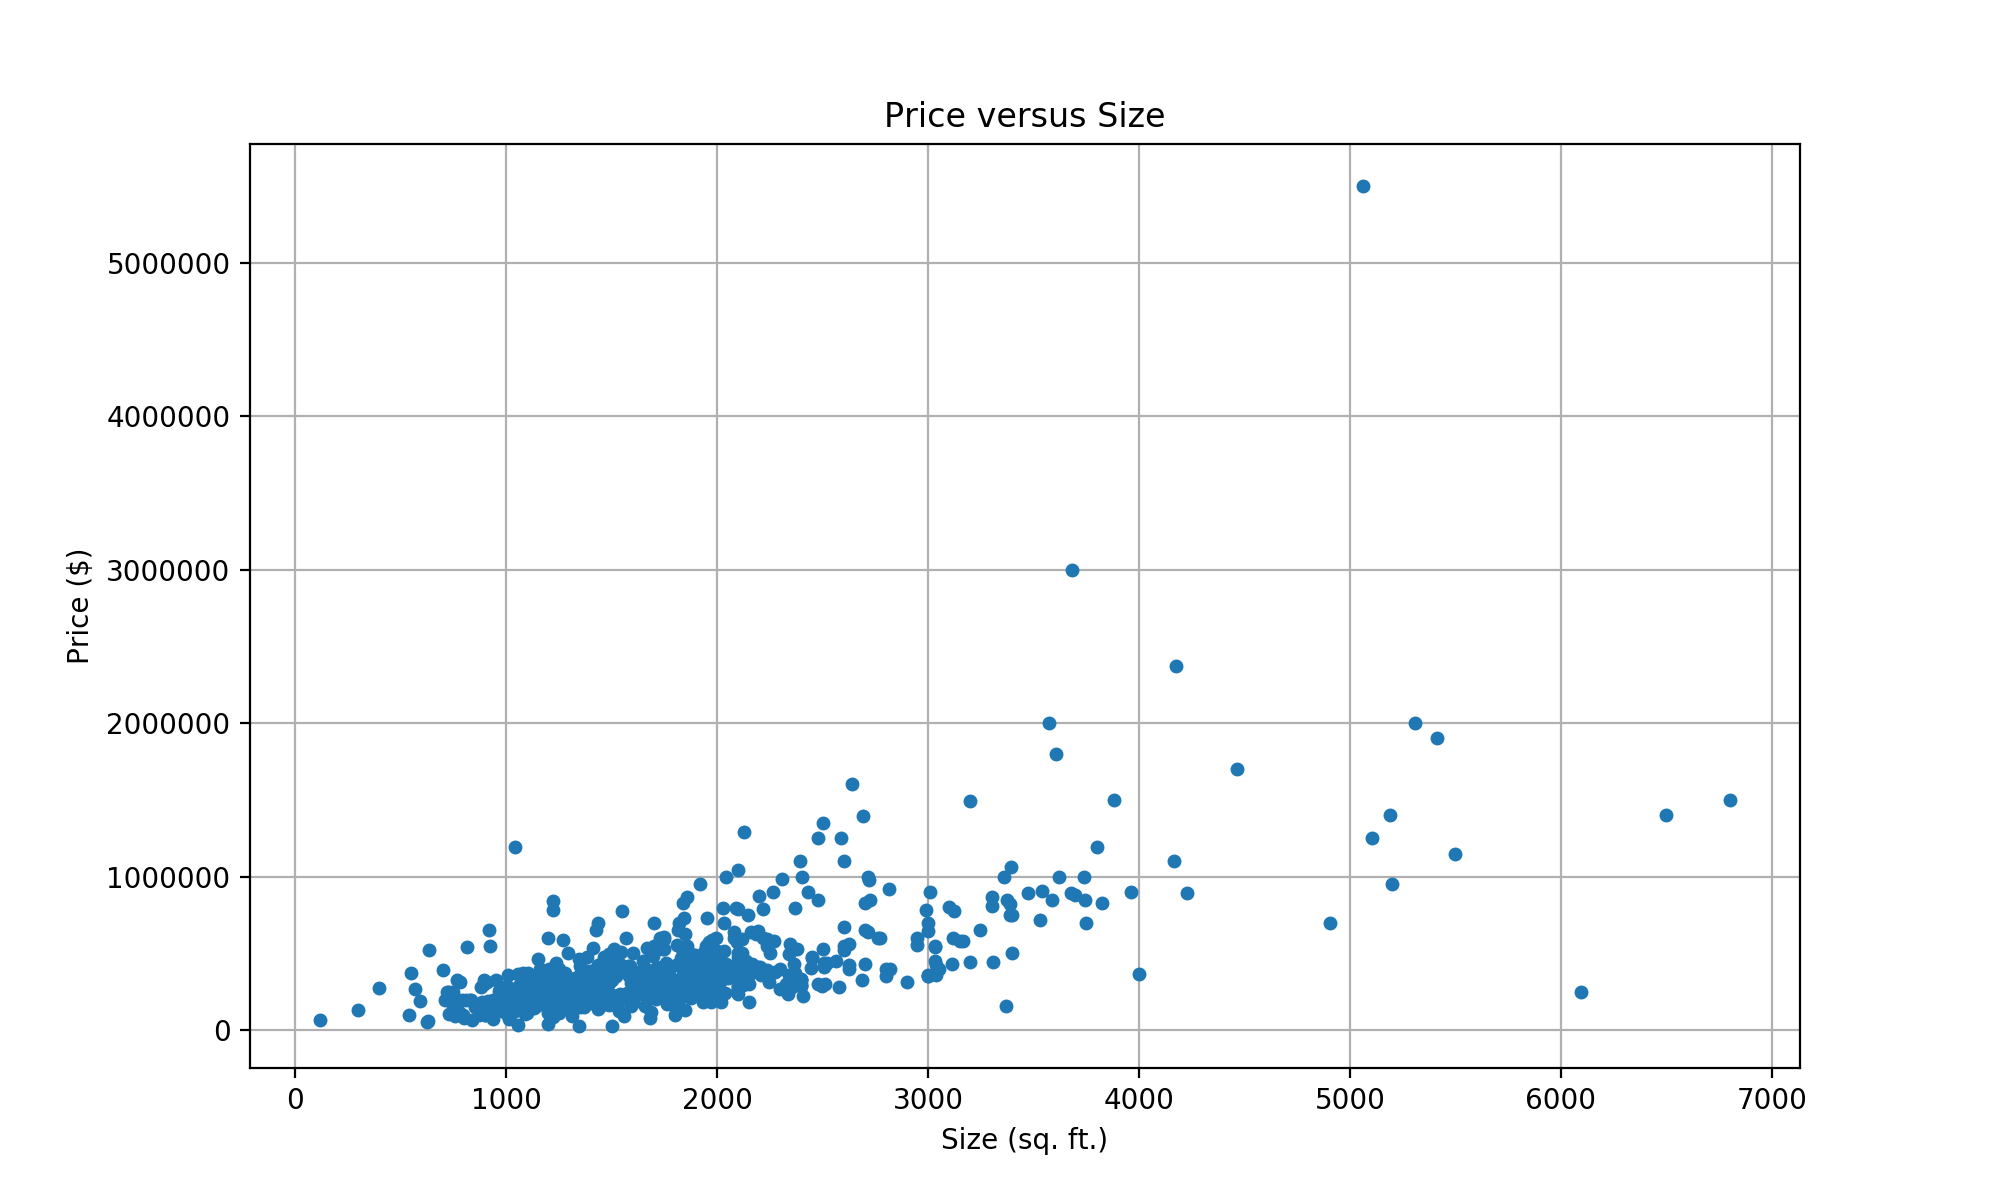

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(data["Size"], data["Price"], "o", markersize=4)
plt.xlabel("Size (sq. ft.)")
plt.ylabel("Price ($)")
plt.title("Price versus Size")
plt.grid()

Can you guess what the correlation is between these two variables?  Here are some plots that may help:

<IPython.core.display.Javascript object>


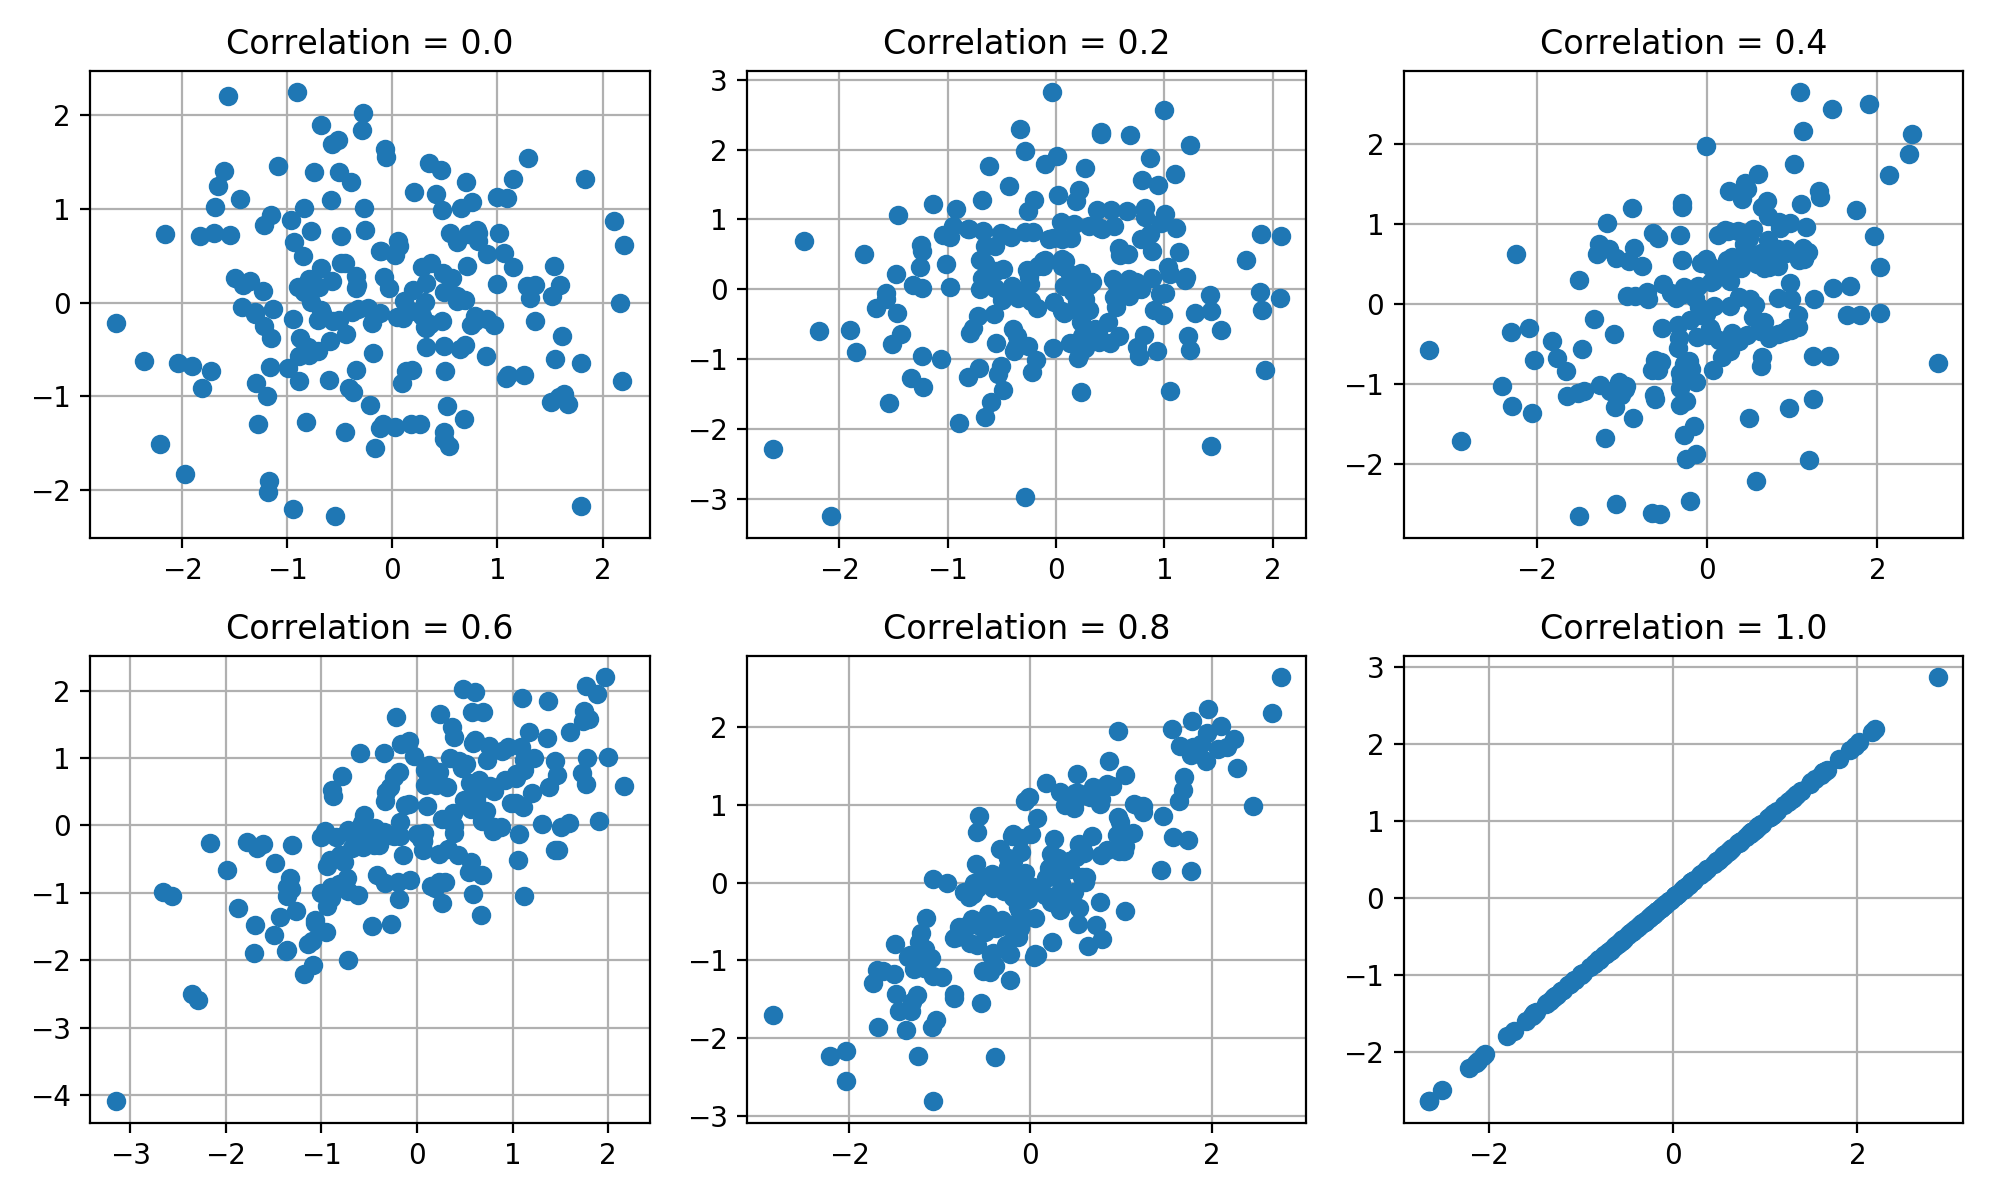

In [4]:
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    test_data = np.random.multivariate_normal([0, 0], [[1, i / 5.0], [i / 5.0, 1]], 200)
    plt.plot(test_data[:,0], test_data[:,1], "o")
    plt.title("Correlation = {}".format(i / 5.0))
    plt.grid()
    
plt.tight_layout()

<div style="border: 3px solid green; padding: 10px">
  <b>Exercise 1:</b> Compute the correlation between the size and price of a house. Also compute the correlations of the bedrooms and bathrooms wiht the price. Which variable shows the highest correlation?
</div>

In [71]:
# Correlation with size and price
print(np.corrcoef(..., ...)[0,1])

# Correlation with bedrooms and price
print(np.corrcoef(..., ...)[0,1])

# Correlation with bathrooms and price
print(np.corrcoef(..., ...)[0,1])

0.664723613866
0.253162417185
0.520110046669


<div style="border: 3px solid green; padding: 10px">
  <b>Exercise 2:</b> (Anscombe's quartet) Given the data below, can you create a scatter plot of the data and compute correlations for each pair?
</div>

In [6]:
x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

<IPython.core.display.Javascript object>


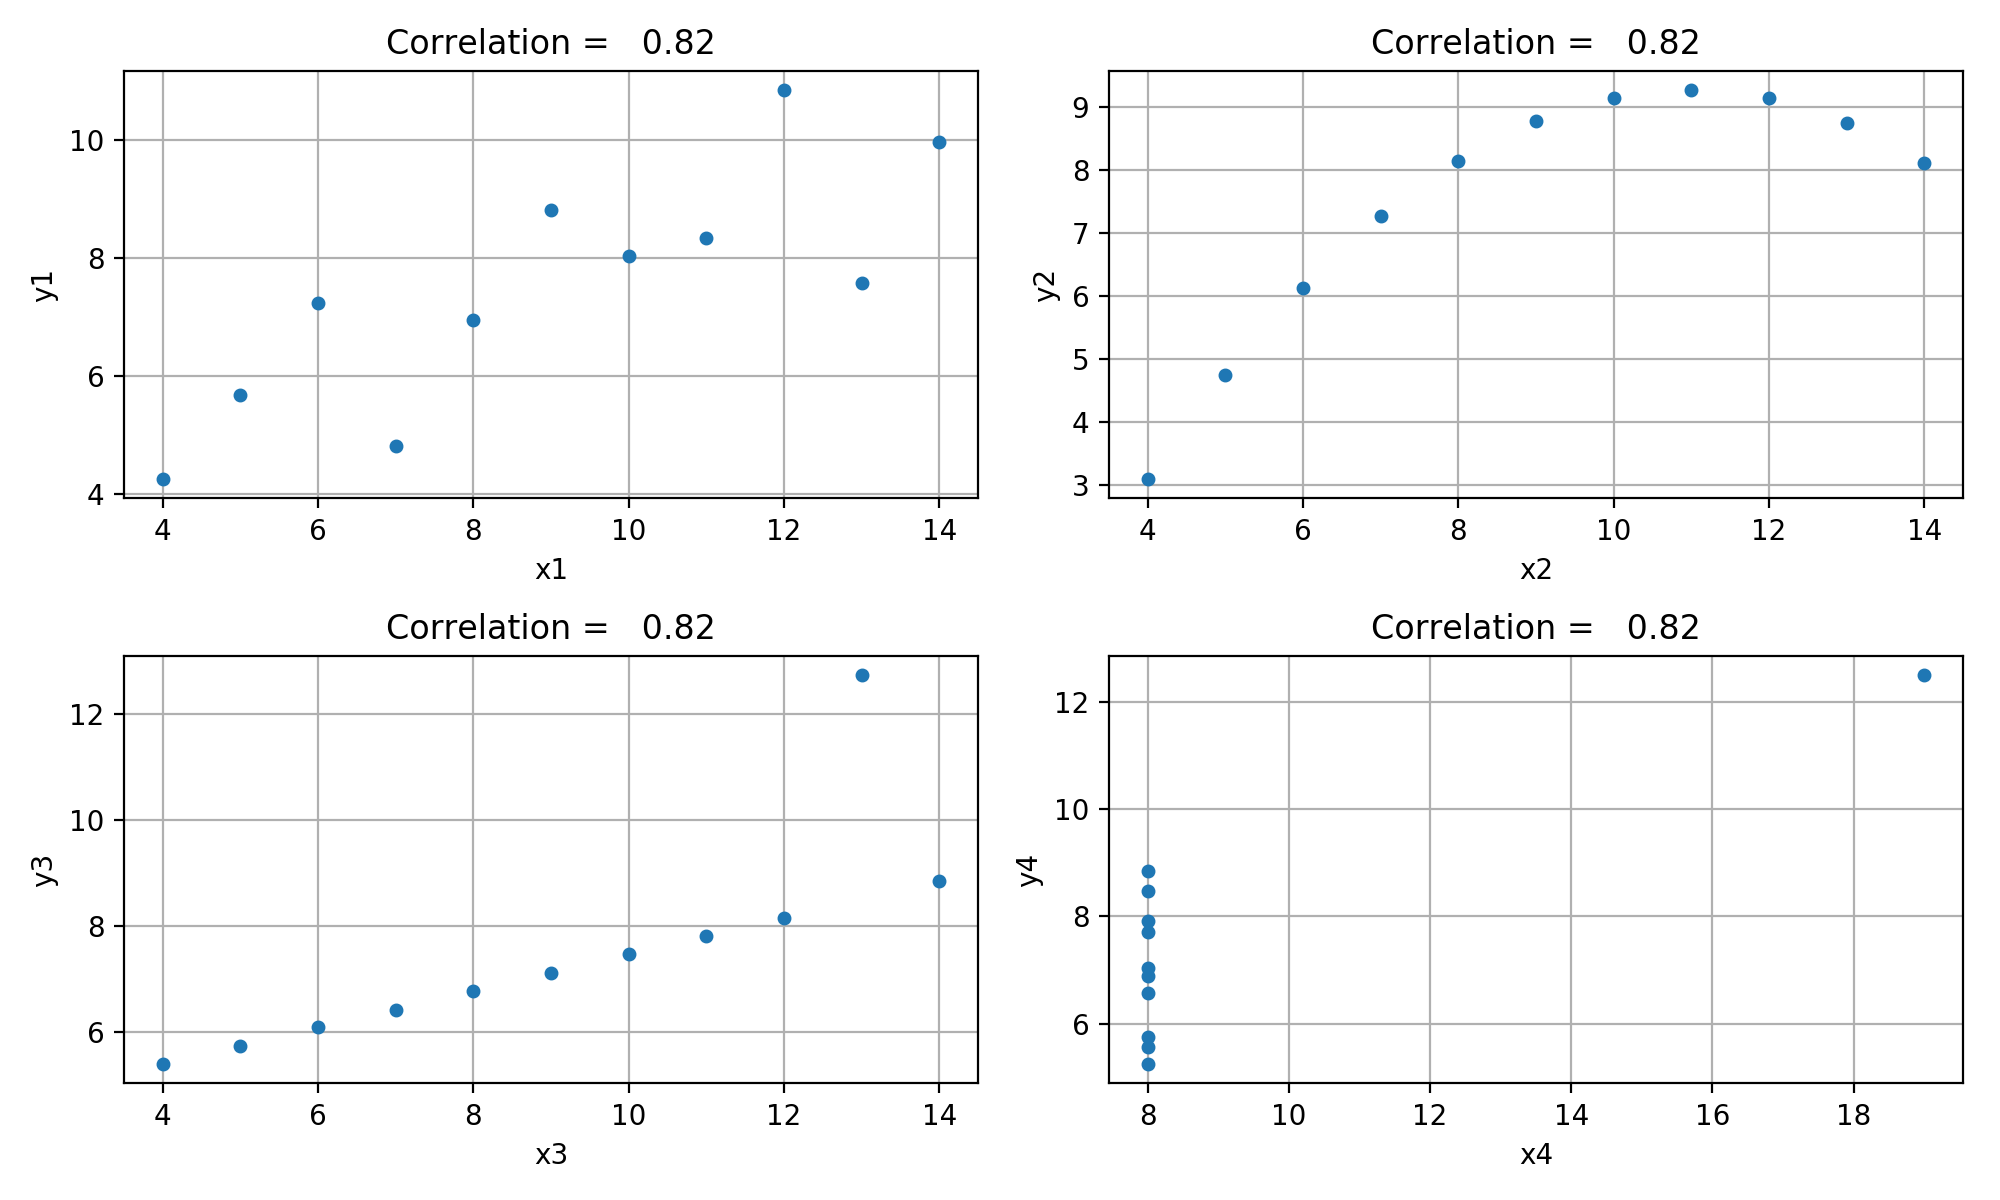

In [7]:
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(eval("x" + str(i+1)), eval("y" + str(i+1)), "o", markersize=4)
    plt.xlabel("x" + str(i+1))
    plt.ylabel("y" + str(i+1))
    plt.title("Correlation = {:6.2f}".format(np.corrcoef(eval("x" + str(i+1)), eval("y" + str(i+1)))[0,1]))
    plt.grid()

plt.tight_layout()

<h2>Fit a Linear Model</h2>

Our goal in this section is to find a linear model between house prices and sizes.  The linear model has the form

$$ \mathrm{price} = a \cdot \mathrm{size} + b $$

We call $a$ the <b>slope</b> and $b$ the <b>intercept</b>.  The animation below shows different linear models superimposed on the data.

<IPython.core.display.Javascript object>


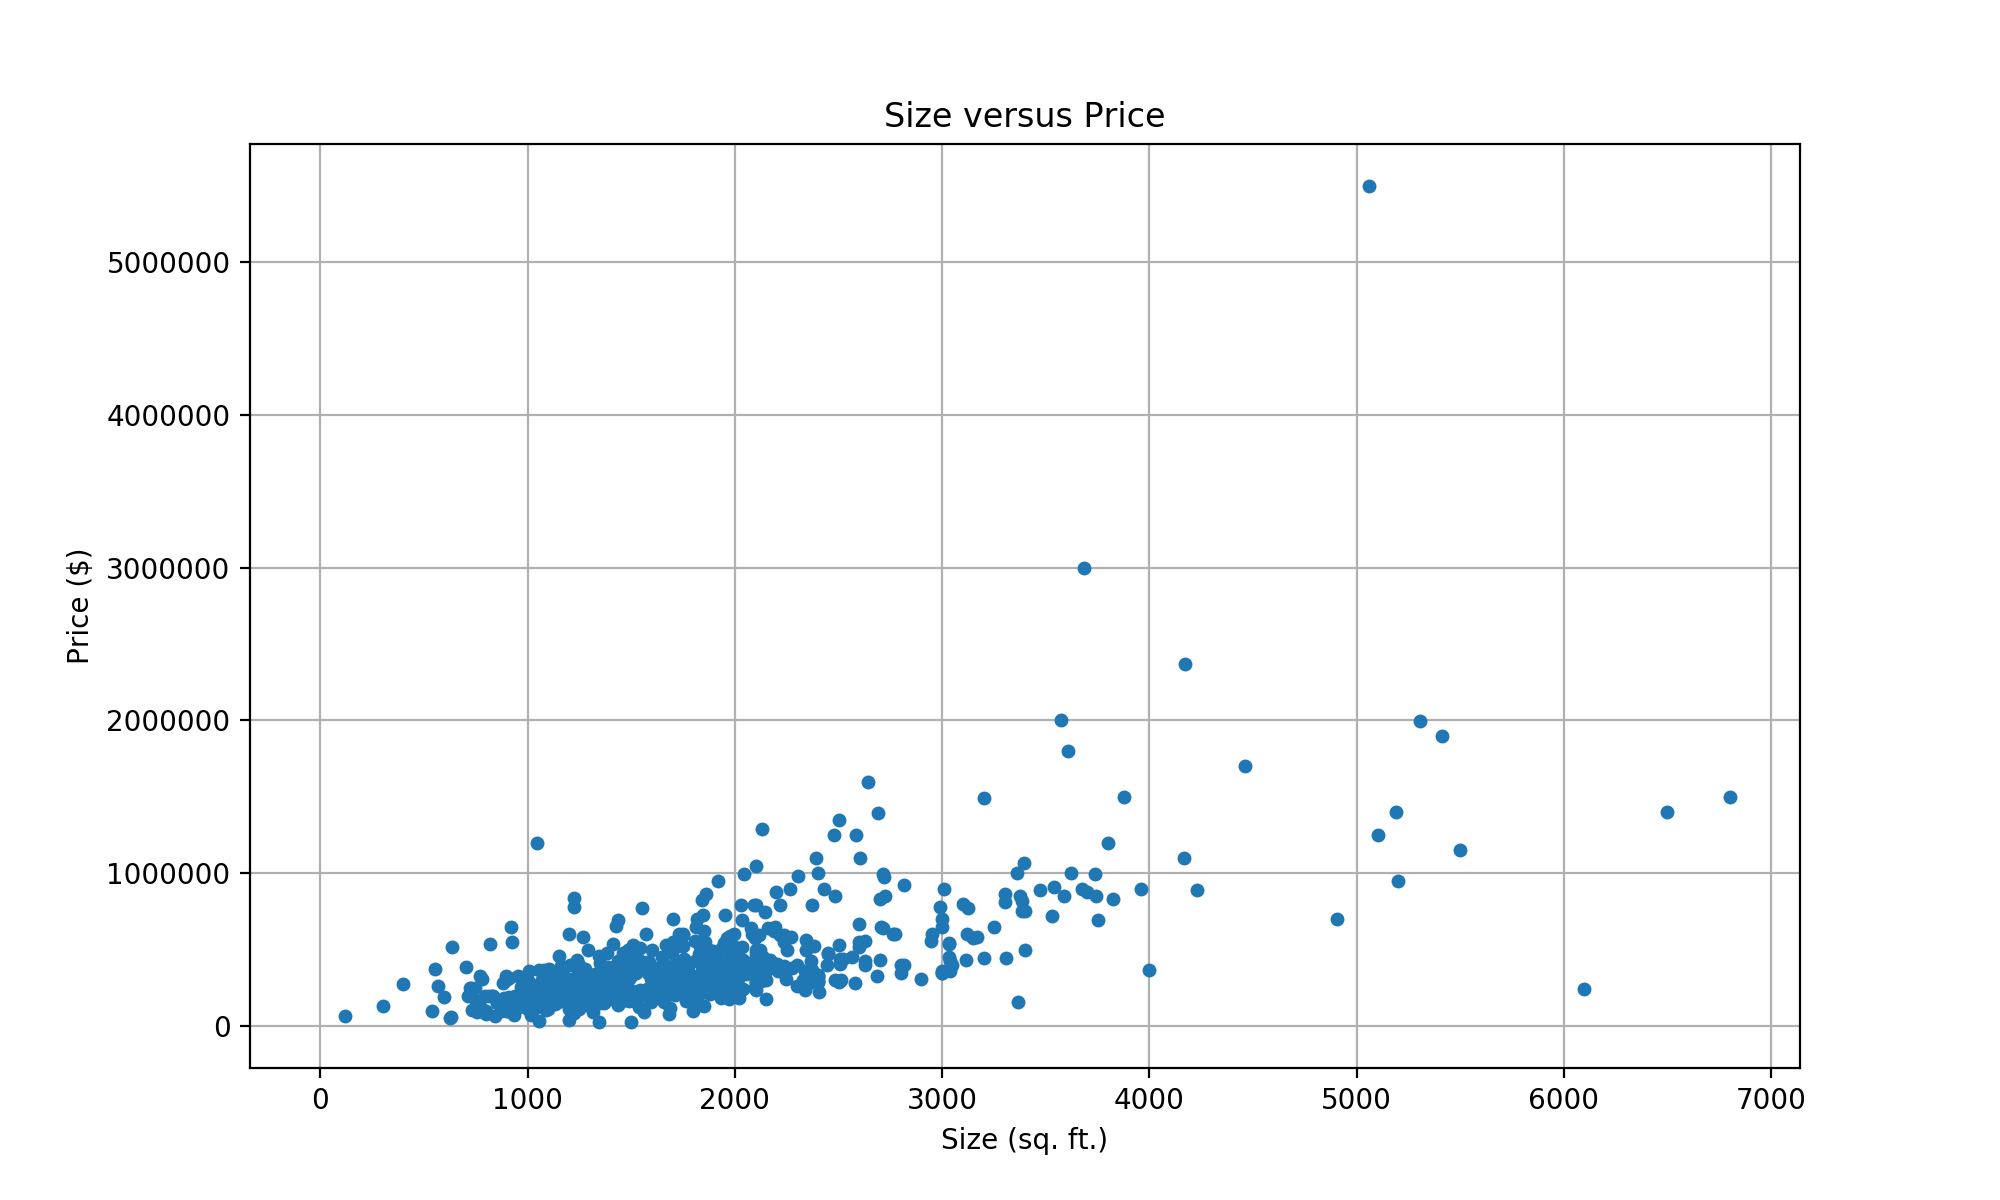

In [9]:
fig = plt.figure(figsize=(10, 6))
plt.ion()

plt.plot(data["Size"], data["Price"], "o", markersize=4)
plt.xlabel("Size (sq. ft.)")
plt.ylabel("Price ($)")
plt.title("Size versus Price")
plt.grid()

xvals = np.arange(data["Size"].max())
for i in range(10):
    for s in range(10):
        intercept = 2e5 * i
        slope = 50 * s
        yvals = slope * xvals + intercept
        line = plt.plot(xvals, yvals, color="r")
        fig.canvas.draw()
        line.pop(0).remove()

<div style="border: 3px solid green; padding: 10px">
  <b>Exercise 3:</b> Guess the slope and intercept of this linear model, without using a computer.  No cheating! Plot the line in together with the scatter plot
</div>

<IPython.core.display.Javascript object>


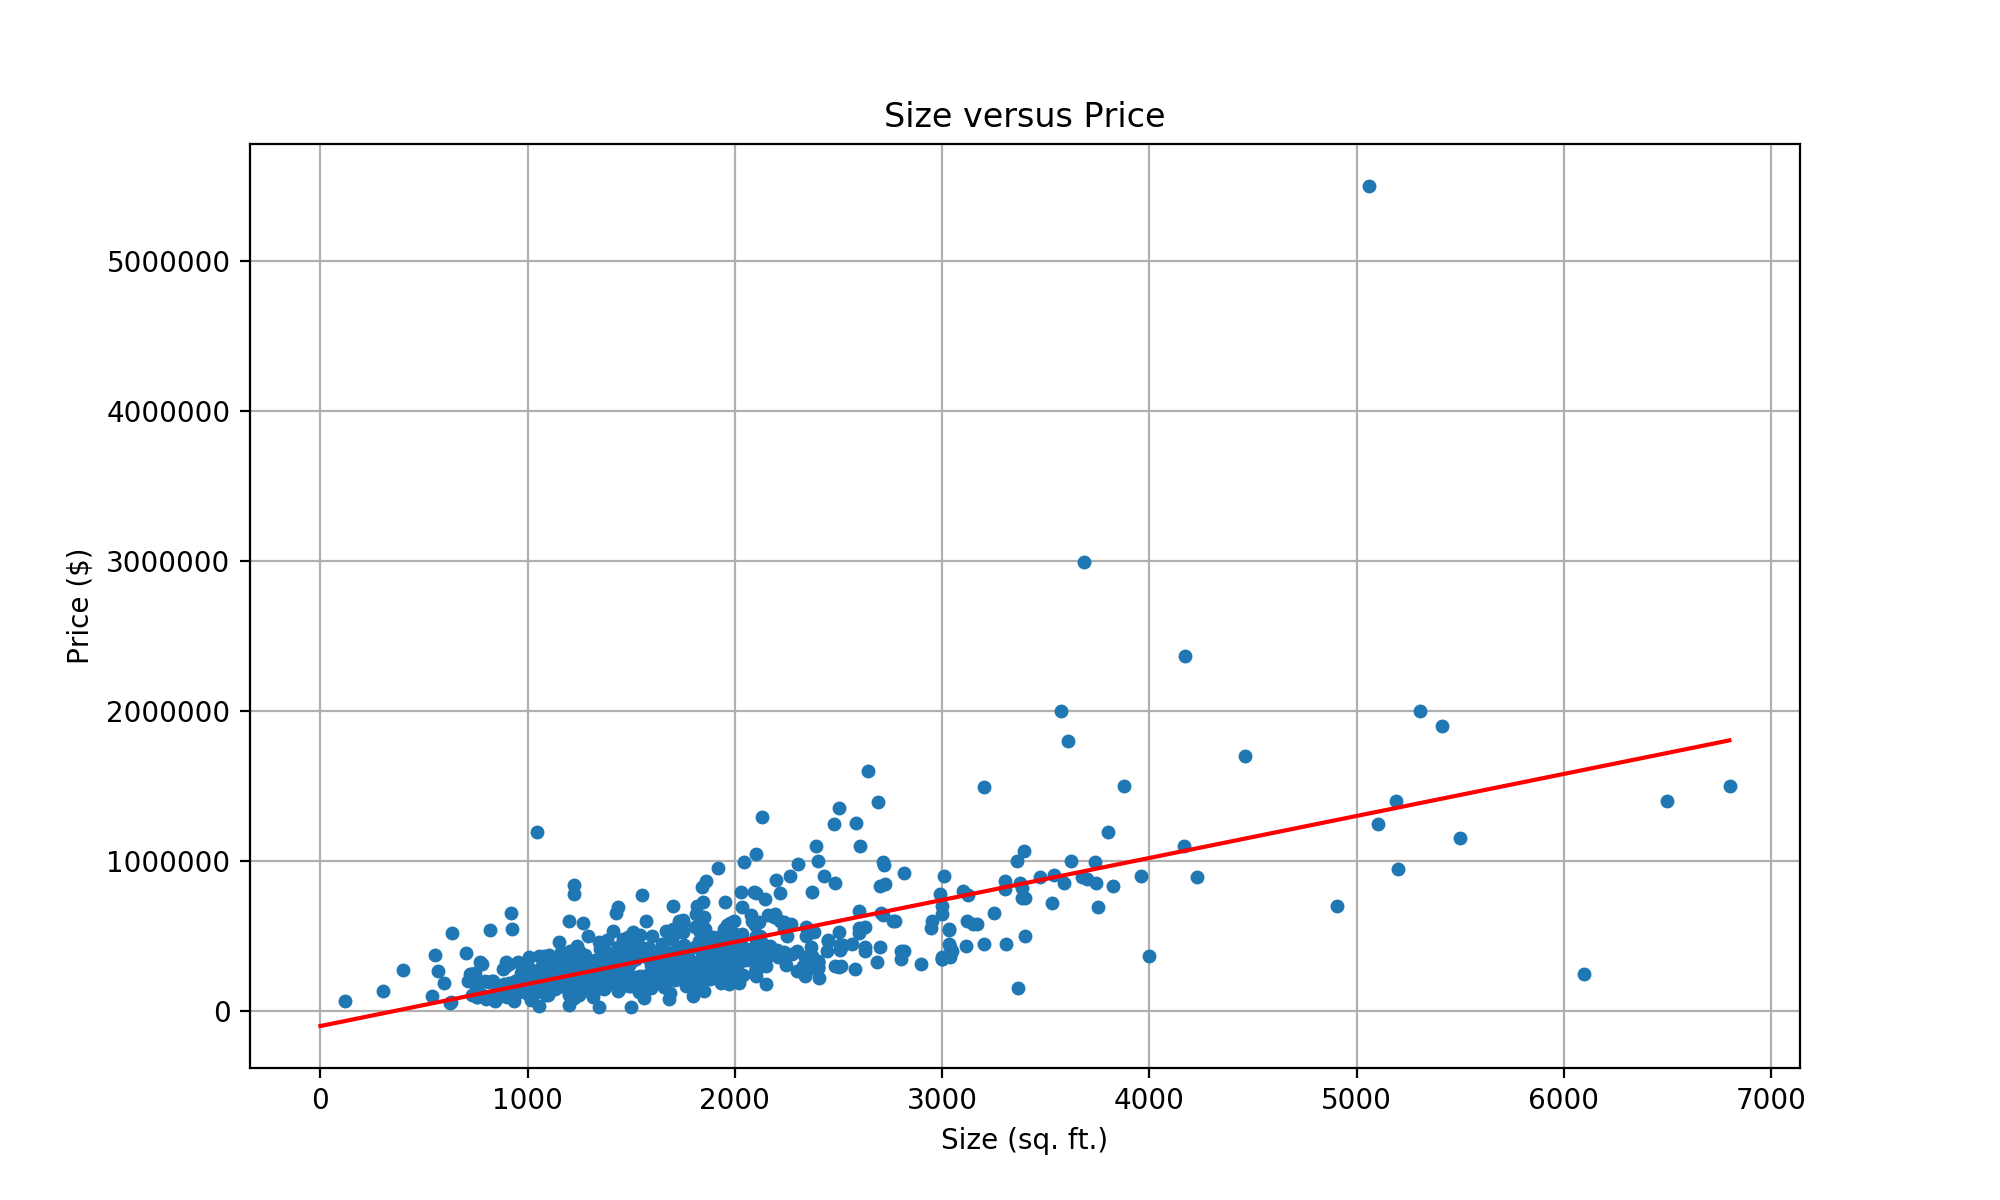

In [11]:
SLOPE = ...
INTERCEPT = ...

fig = plt.figure(figsize=(10, 6))
plt.ion()

plt.plot(data["Size"], data["Price"], "o", markersize=4)
plt.xlabel("Size (sq. ft.)")
plt.ylabel("Price ($)")
plt.title("Size versus Price")
plt.grid()

xvals = np.arange(data["Size"].max()) 
yvals = SLOPE * xvals + INTERCEPT
line = plt.plot(xvals, yvals, color="r")

To fit the linear model, we need to define a <b>loss function,</b> which tells us how much to penalize "errors", or deviations between the actual and fitted values.  The loss function tells us how well the model fits our data.

The sum of squared errors is a popular loss function:

$$ \mathrm{loss} = \sum_{i=1}^N (y_i - a x_i - b)^2 $$

This loss function is popular for many reasons, one of which is its <b>tractability</b>.  In other words, it's easy to write down a closed-form expression for $a$ and $b$ so that we can compute them right away without ever needing to actually evaluate the loss function.

The animation below shows what the loss function looks like for various linear models.

In [12]:
def loss(x, y, slope, intercept):
    predictions = x * slope + intercept
    errors = y - predictions
    return np.sum(errors ** 2)

<IPython.core.display.Javascript object>


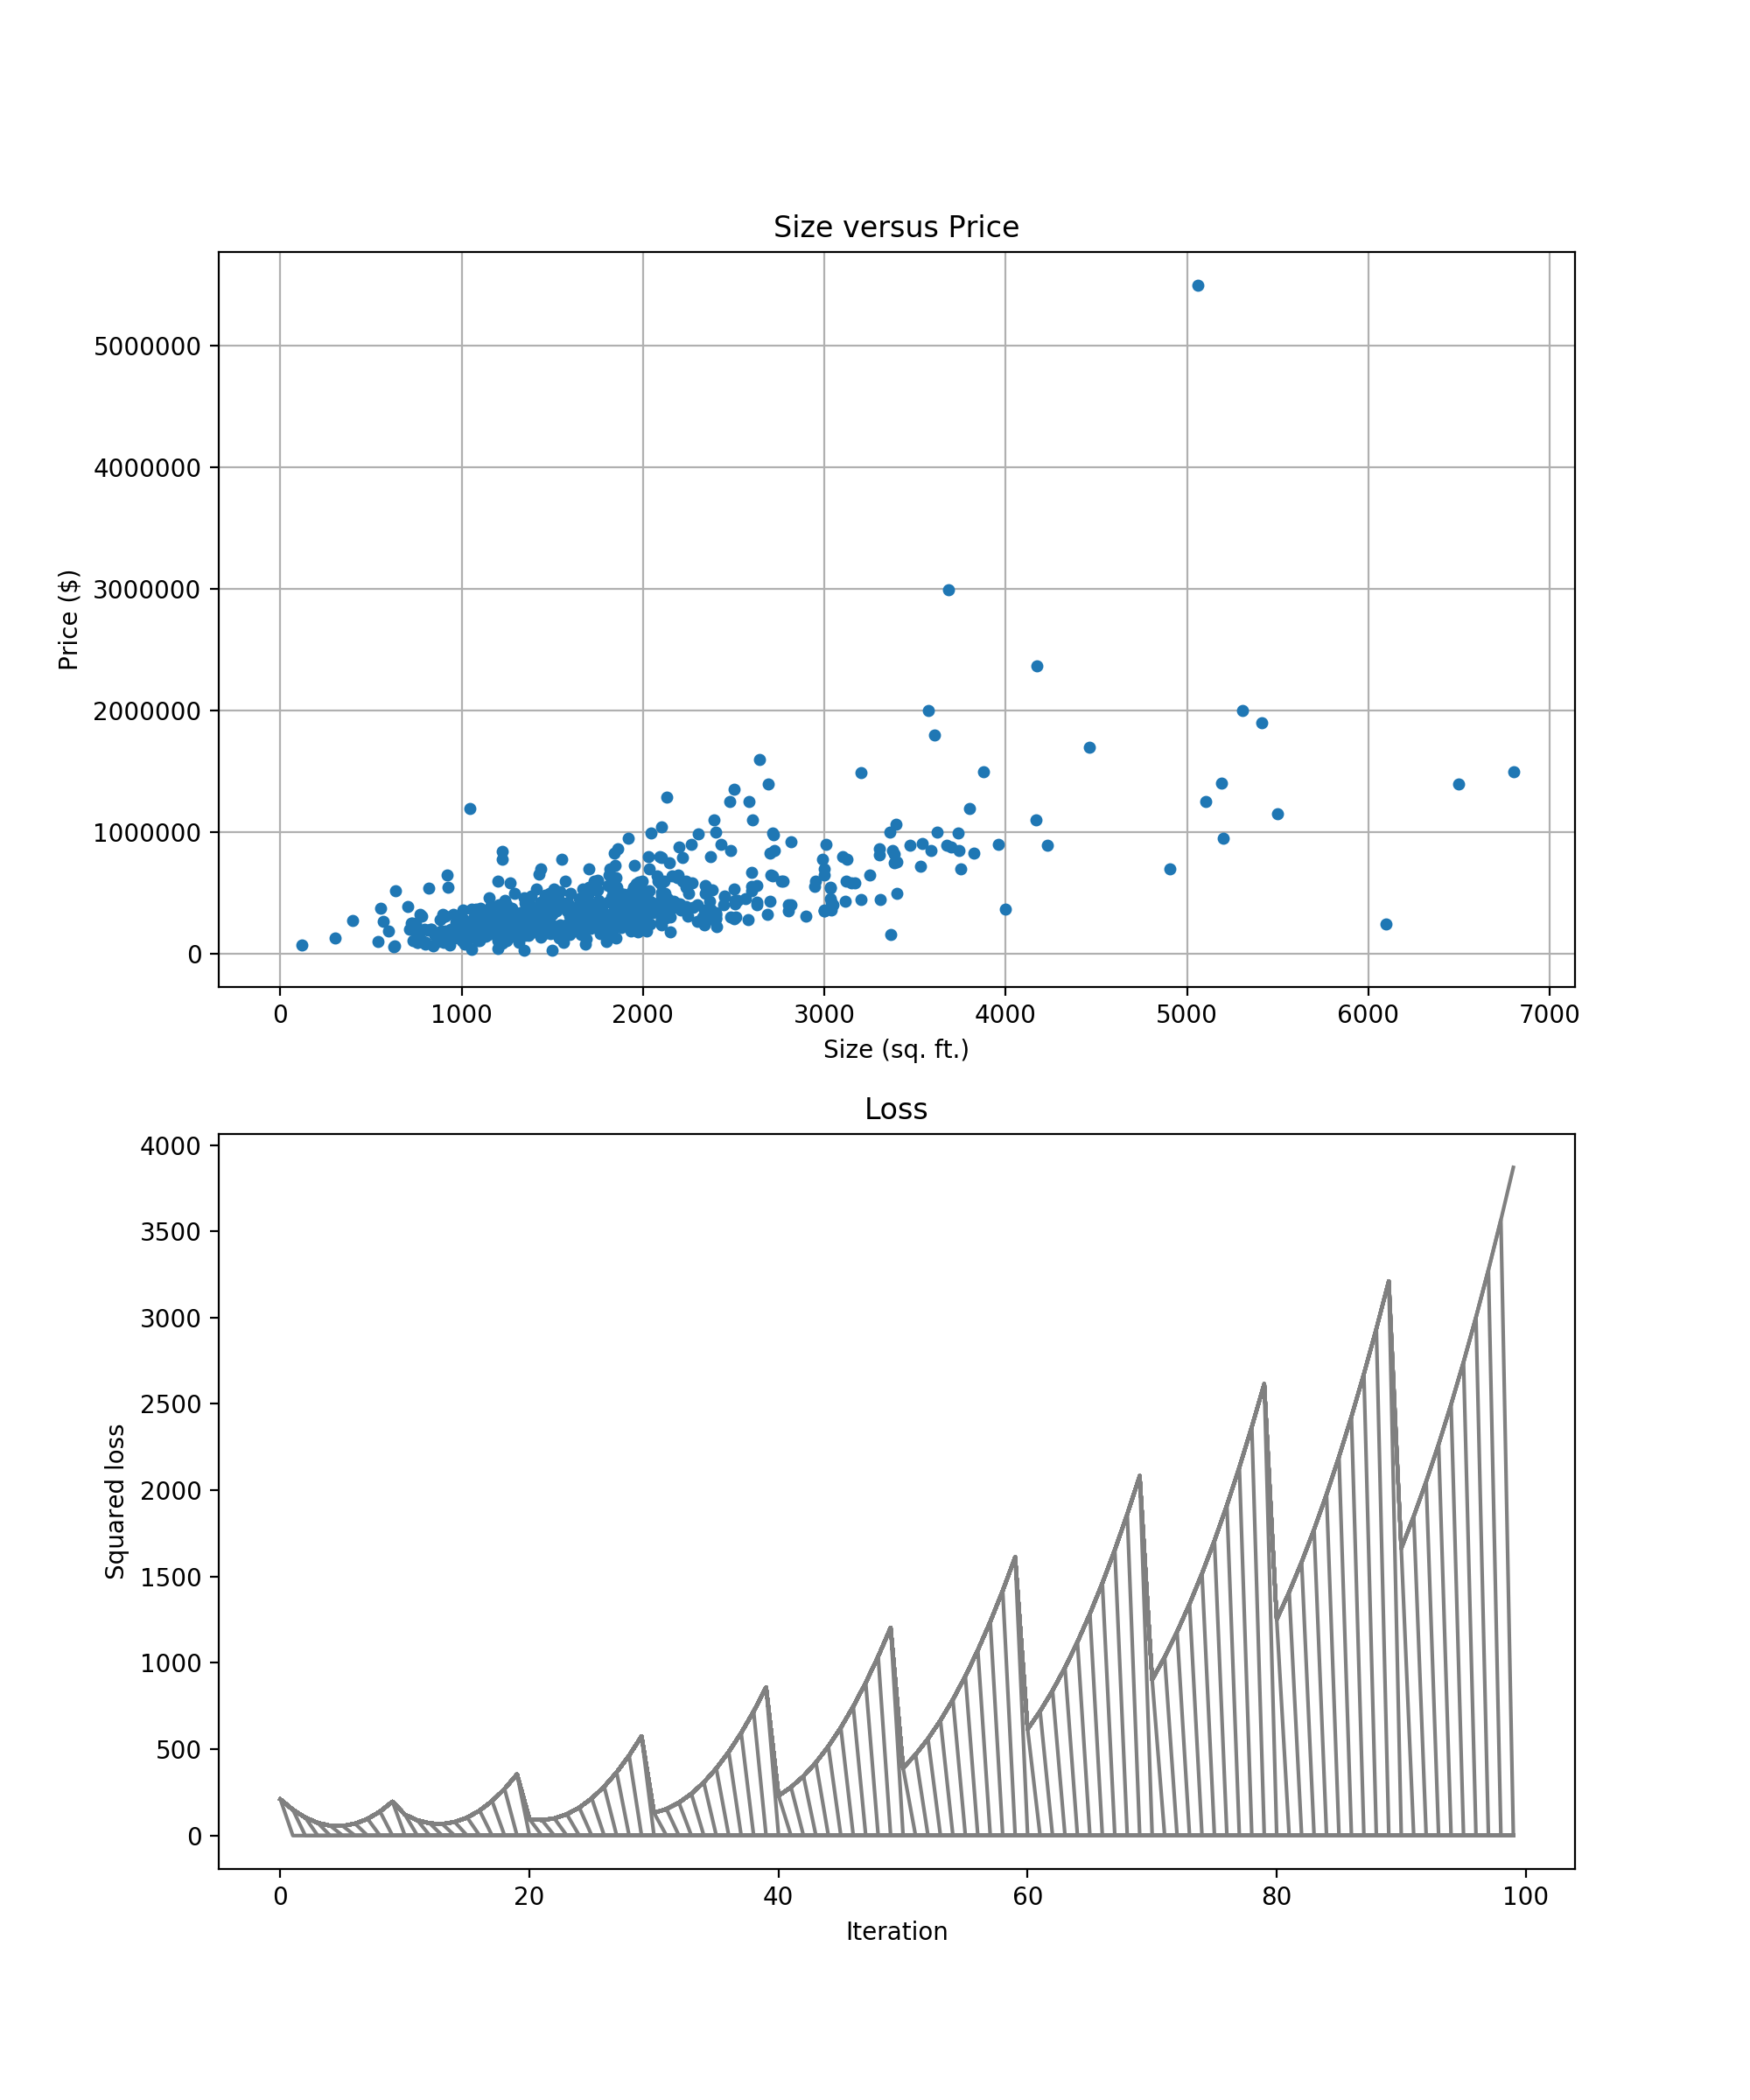

/Users/johnlabiak/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [13]:
fig = plt.figure(figsize=(10, 12))
plt.ion()

losses = np.zeros(100)
counter = 0

xvals = np.arange(data['Size'].max())

plt.subplot(2, 1, 1)
plt.plot(data["Size"], data["Price"], "o", markersize=4)
plt.xlabel("Size (sq. ft.)")
plt.ylabel("Price ($)")
plt.title("Size versus Price")
plt.grid()

for i in np.arange(10):
    for s in np.arange(10):            
        intercept = 2e5 * i
        slope = 50 * s
        yvals = slope * xvals + intercept
        plt.subplot(2, 1, 1)
        line = plt.plot(xvals, yvals, color="r")
        
        loss_value = loss(data["Size"], data["Price"], slope, intercept)
        loss_value = loss_value/1e12
        losses[counter] = loss_value        

        plt.subplot(2, 1, 2)
        plt.plot(np.arange(len(losses)), losses, color ='0.5')
        plt.xlabel("Iteration")
        plt.ylabel("Squared loss")
        plt.title("Loss")
        
        fig.canvas.draw()
        line.pop(0).remove()
        counter += 1

<div style="border: 3px solid green; padding: 10px">
  <b>Exercise 4:</b> Compute the loss for the parameters you chose earlier
</div>

In [14]:
loss = loss(data.Size, data.Price, SLOPE, INTERCEPT)
print(loss)

53093868682775


By now, we will assume you have figured out the closed-form expressions for $a$ and $b$.  Using some of the quantities we learned about in the previous lectures, there is a nice way to write down these formulas.  The slope works out to be the <b>correlation coefficient</b> of the two variables, times the ratio of the <b>standard deviations</b> of the response and predictor variables:

$$ a = r_{xy} \frac{s_y}{s_x} $$

where

$$ s_x = \sqrt{\frac{1}{n - 1} \sum_{i=1}^n (x_i - \bar{x})^2} $$
$$ s_y = \sqrt{\frac{1}{n - 1} \sum_{i=1}^n (y_i - \bar{y})^2} $$
$$ r_{xy} = \frac{\frac{1}{n - 1} \sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{s_x s_y} $$

The intercept is just

$$ b = \bar{y} - a \bar{x} $$.

Now we can finally see what the optimal fit is.

Optimal slope: 283.0895658821391
Optimal intercept: -113509.75165712408


<IPython.core.display.Javascript object>


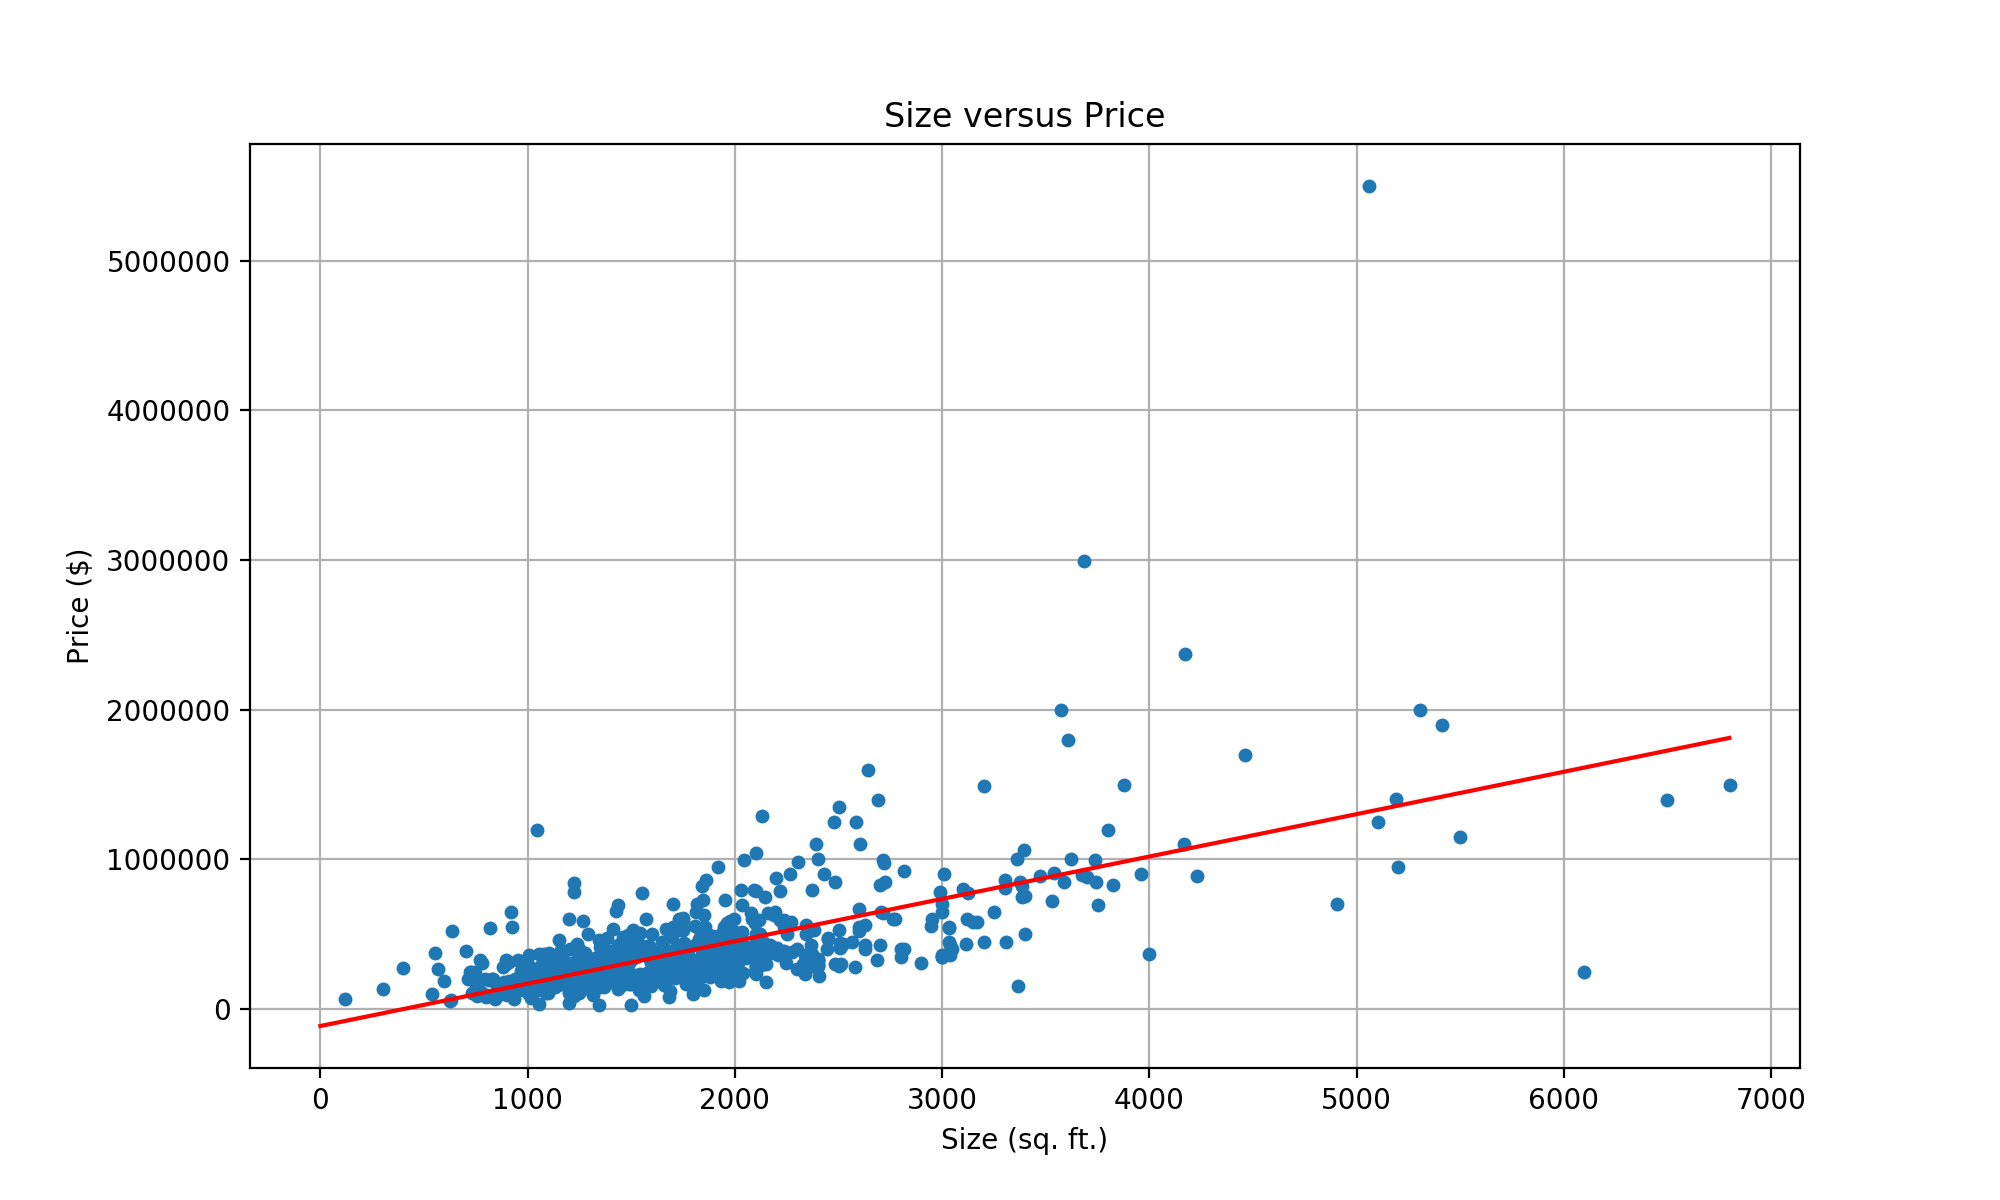

In [15]:
slope_opt = data["Size"].cov(data["Price"]) / data["Size"].var()
intercept_opt = data["Price"].mean() - slope_opt * data["Size"].mean()

print("Optimal slope: {}".format(slope_opt))
print("Optimal intercept: {}".format(intercept_opt))

fig = plt.figure(figsize=(10, 6))
plt.plot(data["Size"], data["Price"], "o", markersize=4)
plt.xlabel("Size (sq. ft.)")
plt.ylabel("Price ($)")
plt.title("Size versus Price")
plt.grid()

xvals = np.arange(data['Size'].max())
yvals = slope_opt * xvals + intercept_opt
plt.plot(xvals, yvals, color="r")
fig.canvas.draw()

So every additional square foot adds about $283 to the price of a house.

<h2>Check the Goodness of Fit</h2>

Now that we have our linear model, how do we tell if it's any good?  While we computed the slope and intercept by hand above, let's try doing this within the Python package statsmodels, which will give us a few extra things for free:

In [38]:
import statsmodels.api as sm
data["Constant"] = 1
m = sm.OLS(data["Price"], data[["Size", "Constant"]]).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     616.7
Date:                Tue, 07 Nov 2017   Prob (F-statistic):          9.77e-101
Time:                        21:28:19   Log-Likelihood:                -10848.
No. Observations:                 781   AIC:                         2.170e+04
Df Residuals:                     779   BIC:                         2.171e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Size         283.0896     11.400     24.833      0.000     260.712     305.467
Constant   -1.135e+05   2.21e+04     -5.141      0.000   -1.57e+05   -7.02e+04
==============================================================================
Omnibus:                     1012.300   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274389.605
Skew:                           6.410   Prob(JB):                         0.00
Kurtosis:                      93.926   Cond. No.                     4.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

While there are lots of numbers here, a few confirm what we could probably tell from linear inspection: overall, this is a good model:

- The <b>R-squared</b>, which is the squared correlation coefficient, is 44.2%, which is pretty good for a linear model.  Just how good is given by the <b>F-statistic</b>, which roughly tells us how implausible it would be to see such a high correlation between the house prices and sizes that we happen to have here, under the assumption that there is actually no correlation between the two.  The actual probability is given by the <b>P-value</b> of the F-statistic, which is less than $10^{-100}$.  This means the probability of seeing a relationship this strong if in truth one did not exist is less than the probability that you could pick one atom out of all of the atoms in the universe.
- While the R-squared gives an idea of how good the overall linear model is, we can look at the next table to see how much the size of the house and the intercept (constant) contribute to the model.  For example, maybe we don't need to bother with a constant term at all and just looking at the $a \cdot \mathrm{size}$ part of the model would be good enough.  However, the p-values on both of these variables are quite small, which tells us that both pieces of the model have a statistically significant contribution.

<div style="border: 3px solid green; padding: 10px">
  <b>Exercise 5:</b> Based on the output above, would you accept or reject the null hypothesis that bigger homes are more expensive?
</div>

However, imagine if <a href="http://www.cnn.com/style/article/worlds-most-expensive-home-villa-les-cedres/index.html">King Leopold of Belgium's house</a> were thrown into our dataset.  At $410 million and (only) 18,000 square feet (but 35 acres of landscaped gardens), it would completely throw off our model -- remember that our loss function penalizes <i>squared</i> errors, so the linear model will do whatever it can to make sure it gets right such extreme values.

<div style="border: 3px solid green; padding: 10px">
  <b>Exercise 6:</b> Add an extreme data point to the house price dataset and rerun statsmodels' linear model fit on the new dataset.  What happens?
</div>

In [39]:
m2 = sm.OLS(
    data["Price"].append(pd.Series([...])), 
    data[["Size", "Constant"]].append(pd.DataFrame({"Size":[...], "Constant":[1]}))).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     1757.
Date:                Tue, 07 Nov 2017   Prob (F-statistic):          5.47e-202
Time:                        21:28:42   Log-Likelihood:                -13551.
No. Observations:                 782   AIC:                         2.711e+04
Df Residuals:                     780   BIC:                         2.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant   -1.428e+07   4.64e+05    -30.740      0.000   -1.52e+07   -1.34e+07
Size        8446.4037    201.480     41.922      0.000    8050.896    8841.911
==============================================================================
Omnibus:                      784.543   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           222049.880
Skew:                           3.911   Prob(JB):                         0.00
Kurtosis:                      85.181   Cond. No.                     3.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

You should find that the R-squared is still good and that the p-values are all still practically zero -- but the values of the slope and intercept may be completely different.  Something about this does not seem right: how could one data point distort the model so much?  Clearly, R-squared doesn't capture the whole story.

The linear model makes two critical assumptions (there are others, but these are two of the most important):

- <b>Homoskedasticity</b>: This is a fancy way of saying that the variance of the errors is the same no matter what the value of the predictor variable is.  In other words, the predicted range of house prices is about as wide for a 1,000 square foot house as it is for a 10,000 square foot house.
- <b>Independence of errors</b>: This means that knowing how much the model gets one house price wrong shouldn't tell us anything about how much the model gets wrong the prices of other houses.

Both of these assumptions are quite strong and rarely hold in practice: the goal is more to make sure they hold reasonably well.  Let's look at the residuals to see how well they hold:

<IPython.core.display.Javascript object>


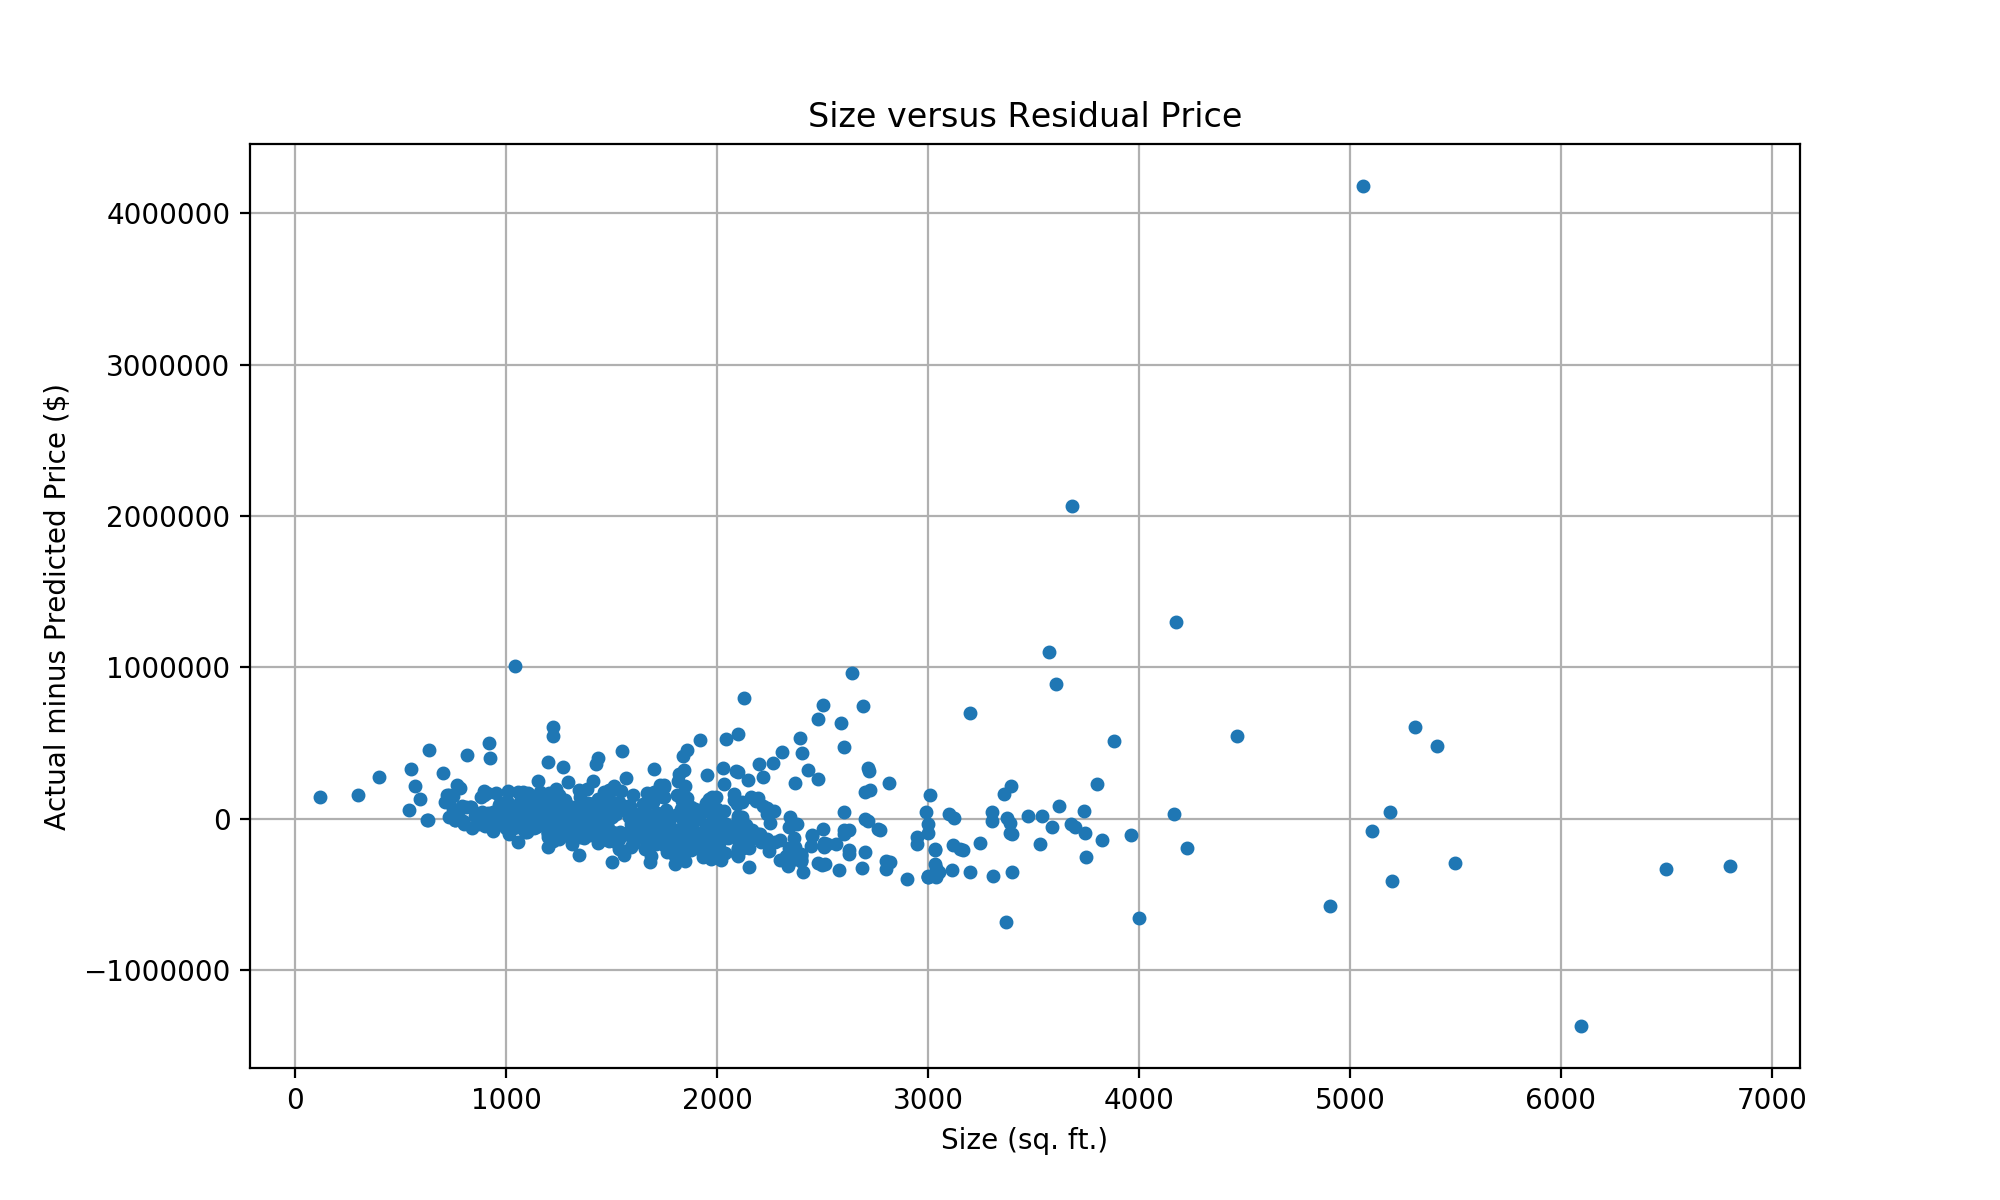

In [40]:
data["Residual"] = m.resid

fig = plt.figure(figsize=(10, 6))
plt.plot(data["Size"], data["Residual"], "o", markersize=4)
plt.xlabel("Size (sq. ft.)")
plt.ylabel("Actual minus Predicted Price ($)")
plt.title("Size versus Residual Price")
plt.grid()

It doesn't take college-level statistics to tell that neither of the assumptions above hold that well.  First, the errors are clearly much larger for larger houses than for smaller ones.  Second, it looks like we consistently underpredict prices for houses smaller than 1,000 square feet and consistently overpredict prices for houses between 2,000 and 4,000 square feet.

To fix this problem, let's look at histograms of the predictors and responses:

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


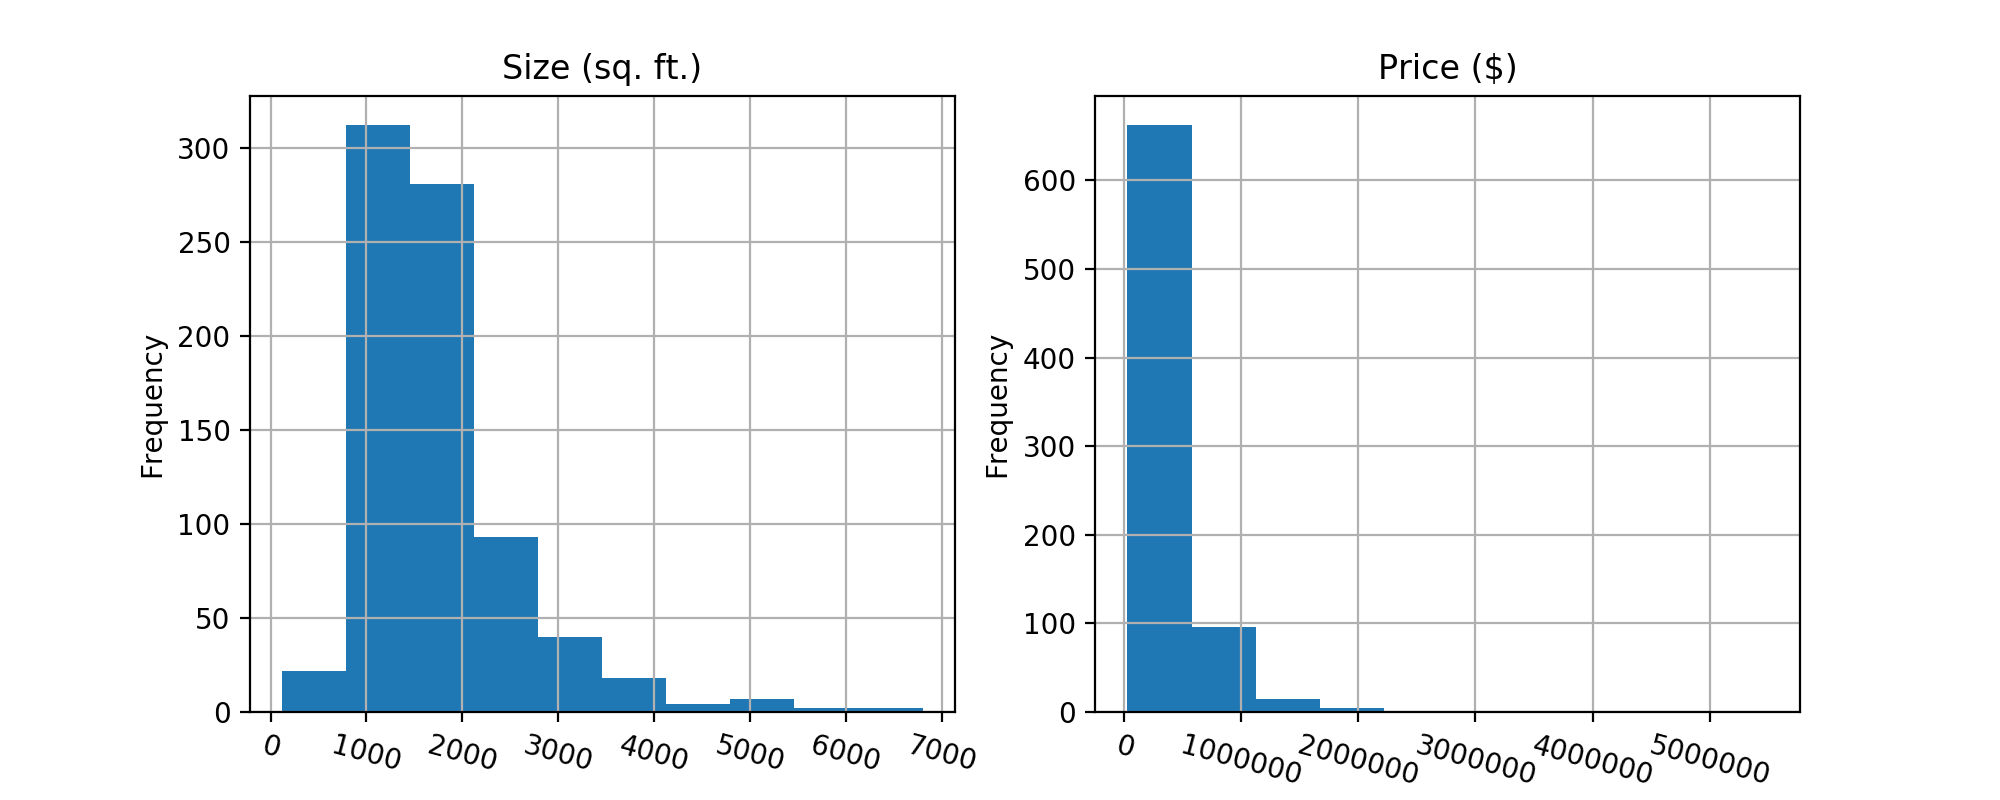

Text(0.5,1,'Price ($)')

In [41]:
%matplotlib
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
data["Size"].plot(kind="hist", rot = -15)
plt.title("Size (sq. ft.)")
plt.grid()
plt.subplot(1, 2, 2)
data["Price"].plot(kind="hist", rot = -15)
plt.grid()
plt.title("Price ($)")

Both of these variables have heavy right tails.  This is a not-infrequent occurrence with variables like size and price that can only be positive.  With a variable like price, it's probably more reasonable to expect that errors will be in percentage rather than absolute bands.  While we may be able to predict the error on a \$500,000 house to within $\pm$\$30,000, it would be unrealistic to expect that for King Leopold's house.  However, perhaps we can predict both house prices to within 6%.

This suggests transforming both prices and sizes logarithmically:

In [42]:
data["logPrice"] = np.log(data["Price"])
data["logSize"] = np.log(data["Size"])

We plot the histograms of the log transformed data. The distribution looks more normal now

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


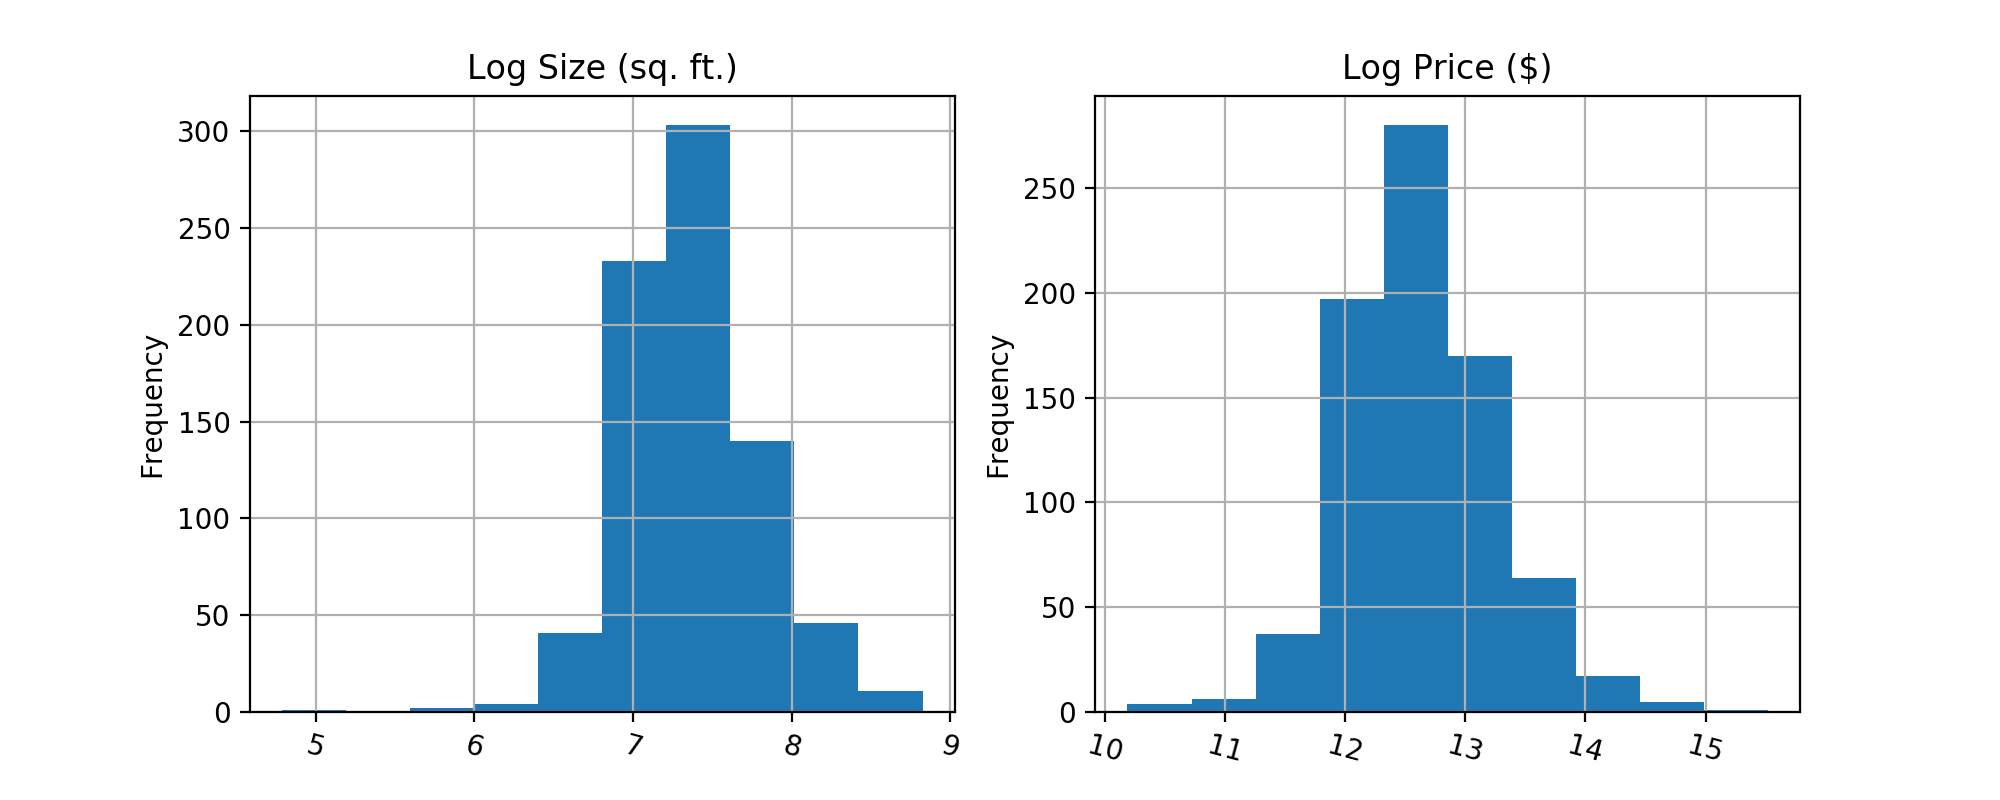

Text(0.5,1,'Log Price ($)')

In [43]:
%matplotlib
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
data["logSize"].plot(kind="hist", rot = -15)
plt.title("Log Size (sq. ft.)")
plt.grid()
plt.subplot(1, 2, 2)
data["logPrice"].plot(kind="hist", rot = -15)
plt.grid()
plt.title("Log Price ($)")

Now we can fit the model

$$ \log \mathrm{Price} = a \cdot \log \mathrm{Size} + b $$:

In [44]:
m = sm.OLS(data["logPrice"], data[["logSize", "Constant"]]).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPrice   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     696.6
Date:                Tue, 07 Nov 2017   Prob (F-statistic):          3.65e-110
Time:                        21:29:30   Log-Likelihood:                -505.91
No. Observations:                 781   AIC:                             1016.
Df Residuals:                     779   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
logSize        1.0491      0.040     26.393      0.000       0.971       1.127
Constant       4.8892      0.294     16.638      0.000       4.312       5.466
==============================================================================
Omnibus:                       47.982   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.990
Skew:                           0.000   Prob(JB):                     4.10e-41
Kurtosis:                       5.391   Cond. No.                         133.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared is only a little better -- three percentage points -- but looking at the residuals shows that the errors look much more homoskedastic and less correlated with one another:

<IPython.core.display.Javascript object>


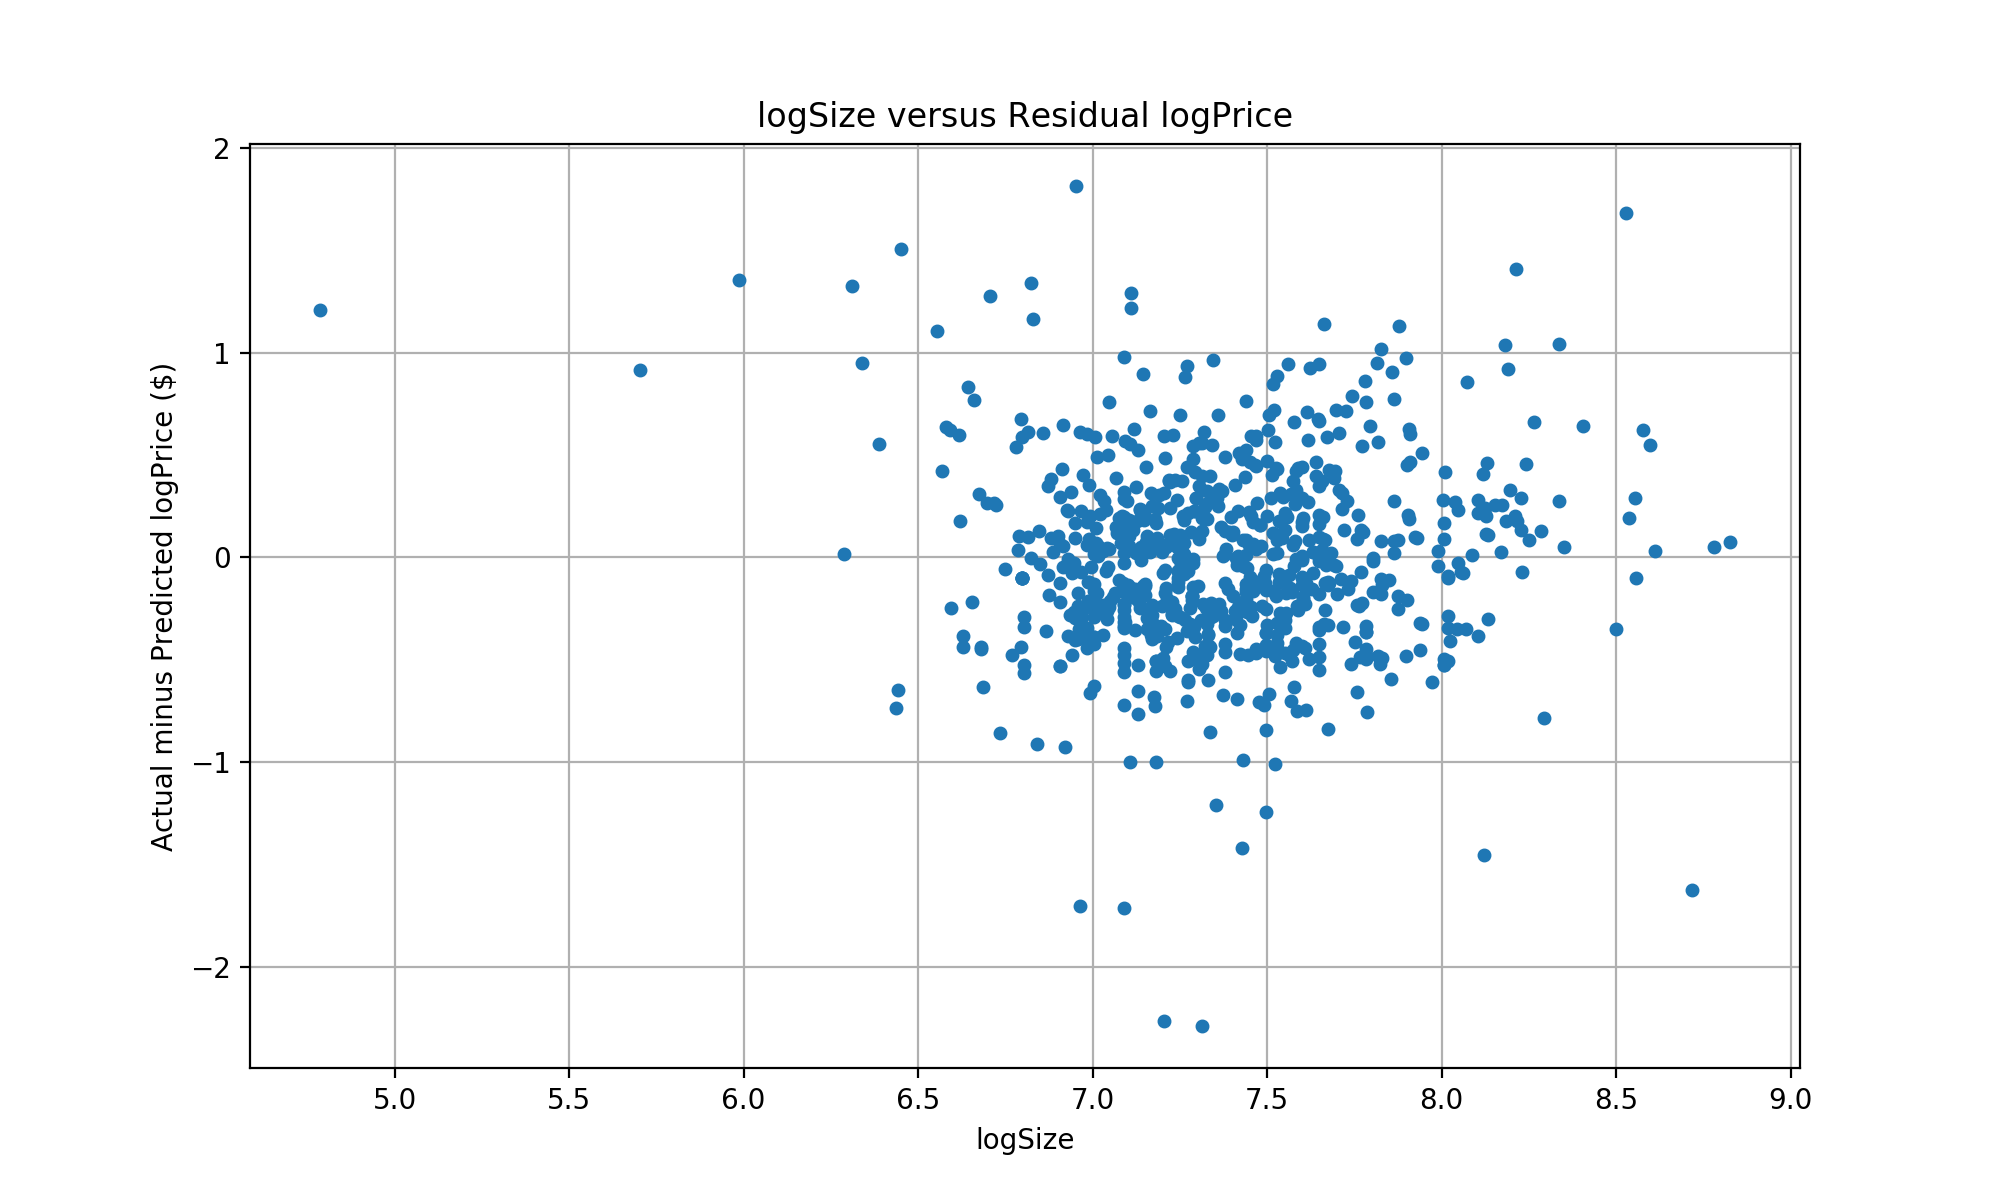

In [45]:
data["Residual"] = m.resid

fig = plt.figure(figsize=(10, 6))
plt.plot(data["logSize"], data["Residual"], "o", markersize=4)
plt.xlabel("logSize")
plt.ylabel("Actual minus Predicted logPrice ($)")
plt.title("logSize versus Residual logPrice")
plt.grid()

To actually get the house price prediction, we can exponentiate both sides of the fitted model:

$$ \mathrm{price} = e^{4.8892} \cdot \mathrm{size}^{1.0491} \approx = 132.8 \cdot \mathrm{size}^{1.0491} $$

So prices are pretty close to linear in house size but grow just a bit faster.

<div style="border: 3px solid green; padding: 10px">
  <b>Bonus exercise 1:</b> How would you confirm that the log transformation has made the distribution more normal?
</div>

<div style="border: 3px solid green; padding: 10px">
  <b>Bonus exercise 2:</b> Plot the scatter plot together with the regular and log space fitted lines
</div>